# admixture graphs

One of the main features of the admixtools package is that it can be used nicely for admixture graphs.

These are a powerful tool for representations of population relationships, i.e. a simplified demographic model of the topology of their tree, with admixture nodes connecting some branches. This can help to distinguish scenarios. In principle, they are based on f-statistics. You may find all details here:

https://uqrmaie1.github.io/admixtools/articles/graphs.html

When it comes to accessing these graphs, admixtools has a specification. Have a look at how these are specified here: https://uqrmaie1.github.io/admixtools/articles/io.html

This is one example of how a file should look like:

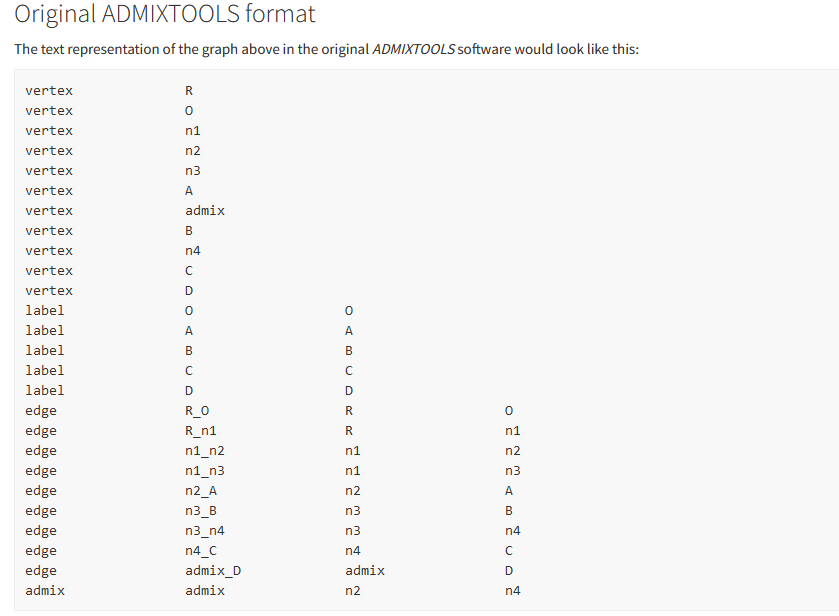


For a simple graph like this:

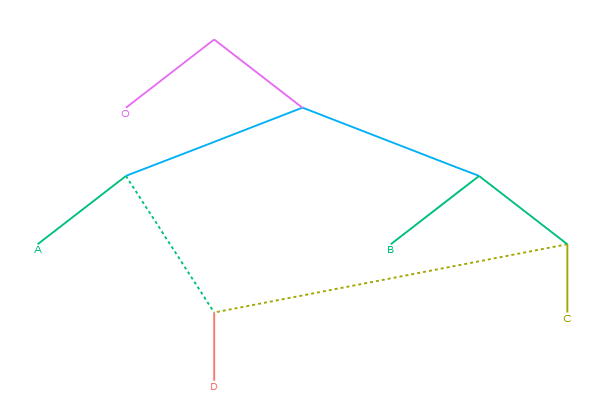


Now consider that many aDNA papers create something like this:

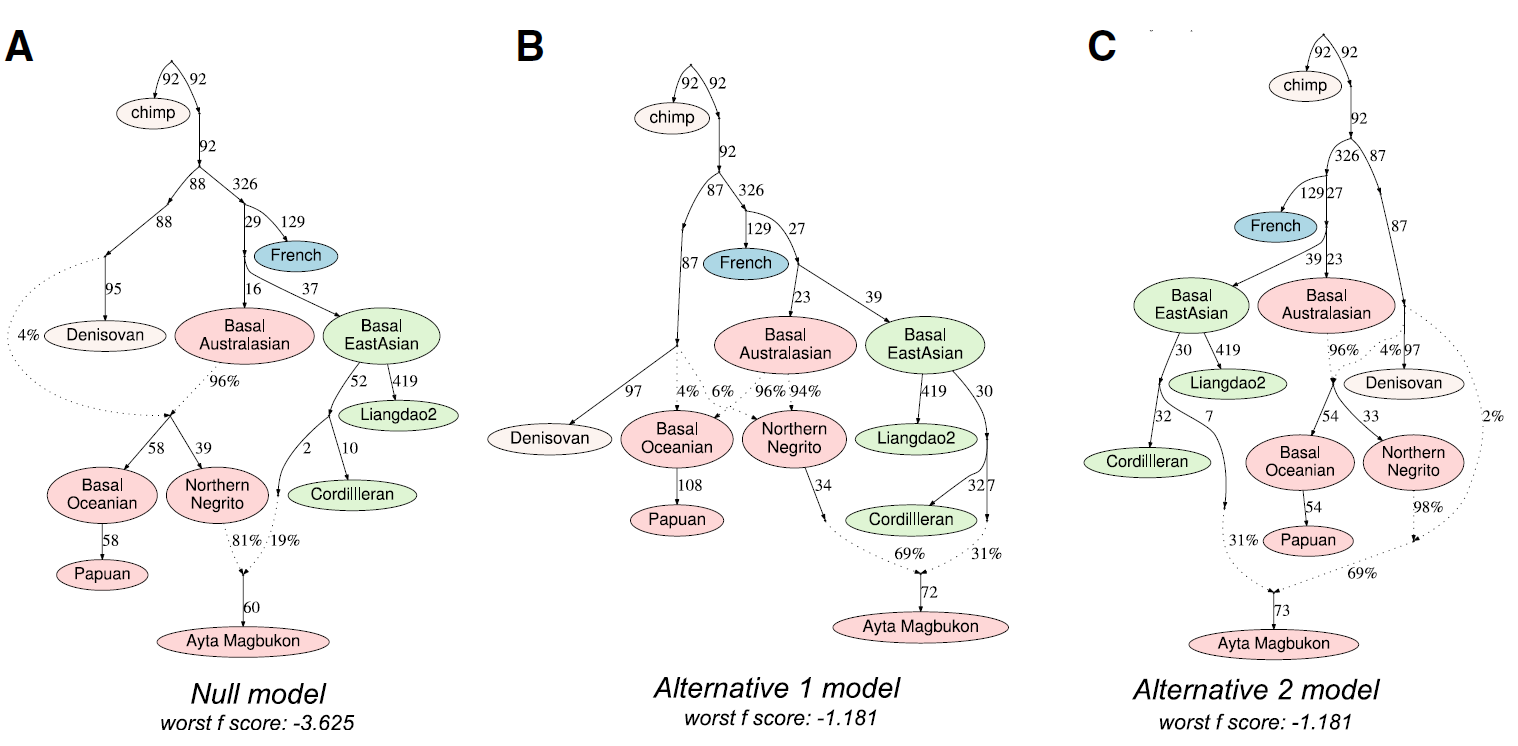


Not only is it complex, but also graphs may be statistically indistinguishable, or you may not be able to assess all possible graphs for a given set of populations.


## admixturegraphs in the admixtools package

Let's start with a simple random topology of our populations in question:

```
pops=c("Altai_Neanderthal.DG","Denisova.DG", "Finnish.DG", "Japanese.DG","Mbuti.DG", "Papuan.DG","Yoruba.DG","Chimp.REF")
newgraph = random_admixturegraph(pops, numadmix = 0)
plot_graph(newgraph)
```

We should have a look at the raw graph object as well.

Assume instead of this random thing you already have a good graph (integrating archaeological information and prior knowledge) with some complexity, and you want to explore a specific change, then you may code events into this graph.  There is even a GUI in this package that may be used for purposes like that. I have never tried, but it probably works well.

We can check how well the graph fits the f-statistics in our data:

```
qpgraph(f2_blocks, newgraph)
```

This gives us a list in R with a bunch of items. One is a score of fit, where one can generally say: the lower the better (`qpgraph(f2_blocks, newgraph)$score`). Another is f3-statistics (i.e. 3-population statistics), which tells us which parts of the graph are most off (`qpgraph(f2_blocks, newgraph)$f3`).

With such information, one may improve the graph manually


## Finding good admixturegraphs

If you have no idea what the topology may look like, you can perform a screen through randomly created graphs in this admixtools package. The function `find_graphs` will get this, and you can even specify how many admixture events you want. This is a functionality absent from the basic admixtools toolkit, but obviously meaningful if you don't just add edges and leaves to an existing graph.

So, here we start from 0 admixture events, so we get a very basic topology:

```
res_noadmix = find_graphs(f2_blocks, outpop = 'Chimp.REF',numadmix = 0)
```
    
Now we select the best graph and plot it:
```
winner_noadmix = res_noadmix %>% dplyr::slice_min(score, with_ties = FALSE)

plot_graph(winner_noadmix$edges[[1]],title=paste("edges: 0"))
```

Ok, this looks actually good (I hope)! See how well this one fits the real data:

```
qpgraph(f2_blocks, winner_noadmix$edges[[1]])$score
```

We can now compare the fit to the random topology and see if it fits significantly better the f-statistics:

```
fits = qpgraph_resample_multi(f2_blocks, list(winner_noadmix$graph[[1]], newgraph), nboot = 100)
compare_fits(fits[[1]]$score_test, fits[[2]]$score_test)
```

This gives a list of statistics how much better one score is than the other. We have a look.

## Something to do for you:

* Run the function without specifying admixture events, let it find the optimal number on its own.

* Try the same with increasing numbers of admixture events. What do you see? It may take some time to run. 

There are a lot more things one can do with this toolkit, in principle one can replicate the core results of any ancient DNA study (given the data is public)!


# Replicating a study?